In [133]:
# type your code here
# type your code here
# type your code here
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import 'matplotlib.pyplot' 
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')


pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to suppress the notation 'e'    
pd.options.display.float_format = '{:.6f}'.format

# import various metrics from 'Scikit-learn' (sklearn)
from sklearn.model_selection import train_test_split

import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import linear_rainbow
import statsmodels.tsa.api as smt
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.stattools import durbin_watson

from scipy import stats
from scipy.stats import shapiro

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [134]:
train=pd.read_csv('train_F3fUq2S.csv')
test=pd.read_csv('test_Bk2wfZ3.csv')
sample=pd.read_csv('sample_submission_LJ2N3ZQ.csv')

In [135]:
train.head(2)

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,3,29,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,0,22,0,0,0,0,0,0,0,0,10,0.700000


In [136]:
test.head(2)

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience
0,1889,3,61,12871,11,6,1,Noon,6,26,3,37,1,0,0,0,1,0,0,0,14
1,1890,3,54,2569,256,5,1,Morning,2,11,0,22,0,0,0,0,0,0,0,0,10


In [137]:
train.shape

(1888, 22)

In [138]:
test.shape

(762, 21)

In [139]:
sample.head()

,campaign_id,click_rate
0,1889,0.043454
1,1890,0.043454
2,1891,0.043454
3,1892,0.043454
4,1893,0.043454


In [141]:
train.dtypes

campaign_id             int64
sender                  int64
subject_len             int64
body_len                int64
mean_paragraph_len      int64
day_of_week             int64
is_weekend              int64
times_of_day           object
category                int64
product                 int64
no_of_CTA               int64
mean_CTA_len            int64
is_image                int64
is_personalised         int64
is_quote                int64
is_timer                int64
is_emoticons            int64
is_discount             int64
is_price                int64
is_urgency              int64
target_audience         int64
click_rate            float64
dtype: object

In [142]:
#Combining train and test for data preparation

In [143]:
comb=pd.concat([train,test],sort=False,ignore_index=True)

In [144]:
comb.head(2)

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,3,29,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,0,22,0,0,0,0,0,0,0,0,10,0.700000


In [145]:
comb.shape

(2650, 22)

In [146]:
comb.isnull().sum()

campaign_id             0
sender                  0
subject_len             0
body_len                0
mean_paragraph_len      0
day_of_week             0
is_weekend              0
times_of_day            0
category                0
product                 0
no_of_CTA               0
mean_CTA_len            0
is_image                0
is_personalised         0
is_quote                0
is_timer                0
is_emoticons            0
is_discount             0
is_price                0
is_urgency              0
target_audience         0
click_rate            762
dtype: int64

In [147]:
#there is no missing value in dataset

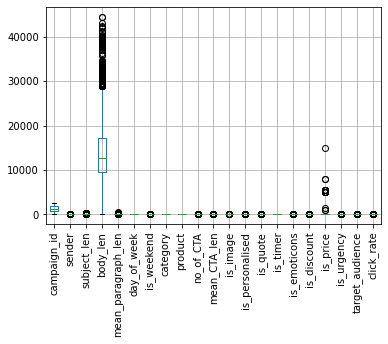

In [148]:
comb.boxplot()
plt.xticks(rotation='vertical')
plt.show()

In [149]:
#yes there are outlier in body_len column
q1=comb.quantile(0.25)
q3=comb.quantile(0.75)
iqr=q3-q1
print(iqr)

campaign_id          1324.500000
sender                  0.000000
subject_len            30.000000
body_len             7683.000000
mean_paragraph_len     19.000000
day_of_week             3.000000
is_weekend              0.000000
category                9.000000
product                17.000000
no_of_CTA               3.000000
mean_CTA_len           11.000000
is_image                2.000000
is_personalised         0.000000
is_quote                1.000000
is_timer                0.000000
is_emoticons            0.000000
is_discount             0.000000
is_price                0.000000
is_urgency              0.000000
target_audience         0.000000
click_rate              0.030176
dtype: float64


In [150]:
comb=comb[~((comb<(q1-1.5*iqr))|(comb<(q3+1.5*iqr)).any(axis=1))]

In [151]:
comb.shape

(2650, 22)

In [152]:
data=comb.copy()

In [153]:
comb.columns

Index(['campaign_id', 'sender', 'subject_len', 'body_len',
       'mean_paragraph_len', 'day_of_week', 'is_weekend', 'times_of_day',
       'category', 'product', 'no_of_CTA', 'mean_CTA_len', 'is_image',
       'is_personalised', 'is_quote', 'is_timer', 'is_emoticons',
       'is_discount', 'is_price', 'is_urgency', 'target_audience',
       'click_rate'],
      dtype='object')

In [154]:
comb.times_of_day.value_counts()

Evening    1849
Noon        622
Morning     179
Name: times_of_day, dtype: int64

In [155]:
dummy=pd.get_dummies(comb,drop_first=True)

In [156]:
dummy.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate,times_of_day_Morning,times_of_day_Noon
0,1,3.000000,76.000000,10439,39,5,1,6,26,3,29.000000,0,0,0,0,0,0,0,0,14.000000,0.103079,0,1
1,2,3.000000,54.000000,2570,256,5,1,2,11,0,22.000000,0,0,0,0,0,0,0,0,NaN,0.700000,1,0
2,3,3.000000,59.000000,12801,16,5,1,2,11,3,23.000000,1,0,1,0,0,0,0,0,16.000000,0.002769,0,1
3,4,3.000000,74.000000,11037,30,4,0,15,9,4,24.000000,0,0,0,0,0,0,0,0,NaN,0.010868,0,0
4,5,3.000000,80.000000,10011,27,5,1,6,26,3,31.000000,0,0,1,0,0,0,0,0,14.000000,0.142826,0,1


In [157]:
dummy = dummy.replace(np.nan, 0)

In [158]:
dummy.isnull().sum().sum()

0

In [159]:
new_train=dummy.loc[0:train.shape[0]-1]
new_test=dummy.loc[train.shape[0]:,:]

In [160]:
new_train.isnull().values.any()

False

In [161]:
new_test.isnull().values.any()

False

In [162]:
new_train.shape

(1888, 23)

In [163]:
new_test.shape

(762, 23)

In [164]:
new_test.drop('click_rate',axis=1,inplace=True)

In [165]:
new_test.shape

(762, 22)

In [166]:
X=new_train.drop('click_rate',axis=1)
y=new_train['click_rate']

In [ ]:
#linear regression model

In [72]:
from sklearn.linear_model import LinearRegression
linregg = LinearRegression()
model=linregg.fit(X,y)
ypred=model.predict(new_test)

In [74]:
#base model 1
df=pd.DataFrame({'campaign_id':new_test.campaign_id,'click_rate':ypred})
df.to_csv("LR_model",index=False)

In [ ]:
#Feature selection through RFE

In [76]:
from sklearn.feature_selection import RFE
linreg=LinearRegression()
rfe=RFE(estimator=linreg,n_features_to_select=5)
rfe_model=rfe.fit(X,y)
rfe_model.ranking_

array([15, 12, 13, 16, 11, 10,  1,  7,  9,  4, 14,  6,  5,  3, 18,  2,  1,
       17,  1,  8,  1,  1])

In [77]:
feat_index=pd.Series(data=rfe_model.ranking_,index=X.columns)

In [78]:
feat_index

campaign_id             15
sender                  12
subject_len             13
body_len                16
mean_paragraph_len      11
day_of_week             10
is_weekend               1
category                 7
product                  9
no_of_CTA                4
mean_CTA_len            14
is_image                 6
is_personalised          5
is_quote                 3
is_timer                18
is_emoticons             2
is_discount              1
is_price                17
is_urgency               1
target_audience          8
times_of_day_Morning     1
times_of_day_Noon        1
dtype: int32

In [79]:
sig_feat=feat_index[feat_index==1].index
sig_feat

Index(['is_weekend', 'is_discount', 'is_urgency', 'times_of_day_Morning',
       'times_of_day_Noon'],
      dtype='object')

In [101]:
xtrain_new=X[['campaign_id','is_weekend', 'is_discount', 'is_urgency', 'times_of_day_Morning',
       'times_of_day_Noon']]
xtest_new=new_test[['campaign_id','is_weekend', 'is_discount', 'is_urgency', 'times_of_day_Morning',
       'times_of_day_Noon']]

xtest_new.shape

(762, 6)

In [98]:

sig_model2=linreg.fit(xtrain_new,y)
sig_model2

LinearRegression()

In [100]:
sig_model2.score(xtrain_new,y)

0.045825398282514085

In [102]:
yprednew=sig_model2.predict(xtest_new)

In [103]:
#base model 2
df=pd.DataFrame({'campaign_id':xtest_new.campaign_id,'click_rate':yprednew})
df.to_csv("sig_model2",index=False)

In [ ]:
#3rd model random forest 

In [105]:

from sklearn.ensemble import RandomForestRegressor


regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

# fit the regressor with x and y data
regressor=regressor.fit(X, y)
regressor

RandomForestRegressor(random_state=0)

In [107]:
predr=regressor.predict(new_test)

In [108]:
#base model 2
df=pd.DataFrame({'campaign_id':new_test.campaign_id,'click_rate':predr})
df.to_csv("Random",index=False)

In [111]:
#XGB 
!pip install xgboost

In [112]:
from xgboost import XGBRegressor as XGB

In [113]:
Xgb = XGB(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

In [114]:
Xgb=Xgb.fit(X,y)
Xgb_pred=Xgb.predict(new_test)

In [115]:
#base model 4
df=pd.DataFrame({'campaign_id':new_test.campaign_id,'click_rate':Xgb_pred})
df.to_csv("XGB",index=False)

In [117]:
Xgb1 = XGB(learning_rate=0.01,gamma=2)

In [118]:
Xgb1=Xgb1.fit(X,y)
Xgb_pred1=Xgb1.predict(new_test)

In [119]:
#base model 4
df=pd.DataFrame({'campaign_id':new_test.campaign_id,'click_rate':Xgb_pred1})
df.to_csv("XGB1",index=False)

In [128]:
dummy.isnull().sum().sum()

0

# Scaling

In [167]:

comb.head(2)

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3.000000,76.000000,10439,39,5,1,Noon,6,26,3,29.000000,0,0,0,0,0,0,0,0,14.000000,0.103079
1,2,3.000000,54.000000,2570,256,5,1,Morning,2,11,0,22.000000,0,0,0,0,0,0,0,0,NaN,0.700000


In [168]:
from sklearn.preprocessing import StandardScaler

ss= StandardScaler()
df_numeric = comb.select_dtypes(include=np.number).drop(["click_rate"],axis=1) 
num_scaled = ss.fit_transform(df_numeric) 
df_num = pd.DataFrame(num_scaled, columns = df_numeric.columns)
df_num.head(2)

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience
0,-1.731397,-0.421031,-0.353487,-0.514432,0.156572,1.222777,1.983639,-0.725028,0.686377,-0.275156,-0.127551,-1.057412,-0.236171,-0.816823,0.000000,-0.315908,-0.196998,-0.069751,-0.356623,0.979943
1,-1.730090,-0.421031,-1.087272,-1.594971,7.964826,1.222777,1.983639,-1.479006,-0.542996,-0.951978,-0.745106,-1.057412,-0.236171,-0.816823,0.000000,-0.315908,-0.196998,-0.069751,-0.356623,NaN


In [172]:

df_categorical = comb.select_dtypes(include="object")
df_cat = pd.get_dummies(df_categorical, drop_first=True)
df1 = pd.concat([df_num,df_cat],axis=1)
df1 = df1.replace(np.nan, 0)
df1.head(1)

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,times_of_day_Morning,times_of_day_Noon
0,-1.731397,-0.421031,-0.353487,-0.514432,0.156572,1.222777,1.983639,-0.725028,0.686377,-0.275156,-0.127551,-1.057412,-0.236171,-0.816823,0.000000,-0.315908,-0.196998,-0.069751,-0.356623,0.979943,0,1


In [171]:
new_train_scale=dummy.loc[0:train.shape[0]-1]
new_test_scale=dummy.loc[train.shape[0]:,:]


In [177]:
new_test_scale.drop('click_rate',axis=1,inplace=True)

In [173]:
Xgb_scale = XGB(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

In [175]:
X1=new_train_scale.drop('click_rate',axis=1)
y1=new_train_scale['click_rate']

In [178]:
Xgb=Xgb.fit(X1,y1)
Xgb_pred_scale=Xgb.predict(new_test_scale)

In [179]:
#base model 5 scale data xgb
df=pd.DataFrame({'campaign_id':new_test_scale.campaign_id,'click_rate':Xgb_pred_scale})
df.to_csv("XGB1_scale",index=False)

# Decision tree

In [180]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor

# create a regressor object
DTregressor = DecisionTreeRegressor(random_state = 0)

# fit the regressor with X and Y data
DTregressor.fit(X1, y1)


DecisionTreeRegressor(random_state=0)

In [183]:
y1pred=DTregressor.predict(new_test_scale)


In [184]:
#base model 6 scale data DT
df=pd.DataFrame({'campaign_id':new_test_scale.campaign_id,'click_rate':y1pred})
df.to_csv("DT_regression",index=False)

In [185]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor

# create a regressor object
DTregressor = DecisionTreeRegressor(random_state = 0)

# fit the regressor with X and Y data
dt1=DTregressor.fit(X, y)


In [186]:
ypreddt=dt1.predict(new_test)


In [187]:
#base model 6 scale data DT
df=pd.DataFrame({'campaign_id':new_test.campaign_id,'click_rate':ypreddt})
df.to_csv("Dt1",index=False)

# Multicolinearity

<AxesSubplot:>

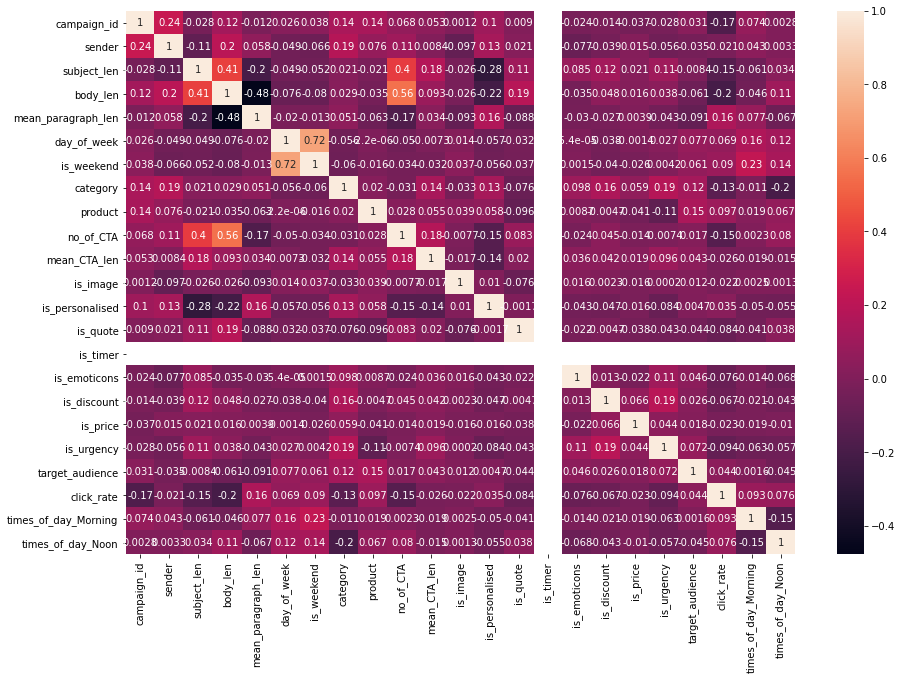

In [189]:
plt.figure(figsize = (15,10))
sns.heatmap(data=dummy.corr(),annot=True)

# Treatment for Multicollinearity

In [193]:
# droping is_timer and is weekend column 
dummy.columns

Index(['campaign_id', 'sender', 'subject_len', 'body_len',
       'mean_paragraph_len', 'day_of_week', 'is_weekend', 'category',
       'product', 'no_of_CTA', 'mean_CTA_len', 'is_image', 'is_personalised',
       'is_quote', 'is_timer', 'is_emoticons', 'is_discount', 'is_price',
       'is_urgency', 'target_audience', 'click_rate', 'times_of_day_Morning',
       'times_of_day_Noon'],
      dtype='object')

In [194]:
dummy=dummy.drop(['is_weekend','is_timer'],axis=1)

In [196]:
dummy.shape

(2650, 21)

In [201]:
new_train1=dummy.loc[0:train.shape[0]-1]
new_test1=dummy.loc[train.shape[0]:,:]
print(new_test1.shape)
print(new_train1.shape)

(762, 21)
(1888, 21)


In [202]:
new_test1.drop('click_rate',axis=1,inplace=True)

In [203]:
print(new_test1.shape)

(762, 20)


In [204]:
X2=new_train1.drop('click_rate',axis=1)
y2=new_train1['click_rate']

In [205]:
Xgb_1 = XGB(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

In [206]:
Xgb2=Xgb_1.fit(X2,y2)
Xgb2_prede=Xgb2.predict(new_test1)

In [207]:
#base model 6 scale data DT
df=pd.DataFrame({'campaign_id':new_test1.campaign_id,'click_rate':Xgb2_prede})
df.to_csv("XGB@",index=False)

# Ensemble method

In [210]:
!pip install vecstack

  Created wheel for vecstack: filename=vecstack-0.4.0-py3-none-any.whl size=19880 sha256=8049edf55148b9e743bcae9b757668606f6ee3c4978d11877771356f0f08fbbe
  Stored in directory: c:\users\123\appdata\local\pip\cache\wheels\17\89\0b\21d5484cbf713c95b641ec1bdc40dd7ae798cbdea2337e3535
Successfully built vecstack


# Stacking

In [229]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from vecstack import stacking

model_1 = LinearRegression()
model_2 = xgb.XGBRegressor()
model_3 = RandomForestRegressor()
 
# putting all base model objects in one list
all_models = [model_1, model_2, model_3]
 
# computing the stack features
s_train, s_test = stacking(all_models, X, y,new_test, sample_weight=None,
    regression=True,
    transform_target=None,
    transform_pred=None,
    mode='oof_pred_bag',
    needs_proba=False,
    save_dir=None,
    metric=None,
    n_folds=4,
    stratified=False,
    shuffle=True,
    random_state=0,
    verbose=0,)
 
# initializing the second-level model
final_model = model_1
 
# fitting the second level model with stack features
final_model = final_model.fit(s_train, y)
 
# predicting the final output using stacking
pred_final5 = final_model.predict(s_test)


In [230]:
#base model 7 GradientBoostingRegressor
df=pd.DataFrame({'campaign_id':new_test.campaign_id,'click_rate':pred_final5})
df.to_csv("Stacking",index=False)

# GradientBoostingRegressor

In [219]:
from sklearn.ensemble import GradientBoostingRegressor

model4 = GradientBoostingRegressor()
 

model4.fit(X, y)
 
# predicting the output on the test dataset
pred_final4 = model.predict(new_test)
 


In [228]:
#base model 7 GradientBoostingRegressor
df=pd.DataFrame({'campaign_id':new_test.campaign_id,'click_rate':pred_final4})
df.to_csv("GradientBoostingRegressor",index=False)